Realised Volatility for each simulated trading day (RV1 to RV60):
RV1    0.036962
RV2    0.033724
RV3    0.034424
RV4    0.035290
RV5    0.038129
dtype: float64

Mean bid-ask spread for each simulated trading day (L1 to L60):
L1    1.325236
L2    1.280329
L3    1.282876
L4    1.296502
L5    1.337059
dtype: float64

Turnover intensity for each simulated trading day (T1 to T60):
T1    547.451435
T2    475.187127
T3    490.410666
T4    514.297437
T5    566.678303
dtype: float64

Raw composite value for each simulated trading day (X1 to X60):
X1    182.937877
X2    158.833727
X3    163.909322
X4    171.876410
X5    189.351164
dtype: float64

Market temperature index (MTI) for each simulated trading day (MTI1 to MTI60):
X1    82.391231
X2    27.343464
X3    38.934837
X4    57.129644
X5    97.037549
dtype: float64


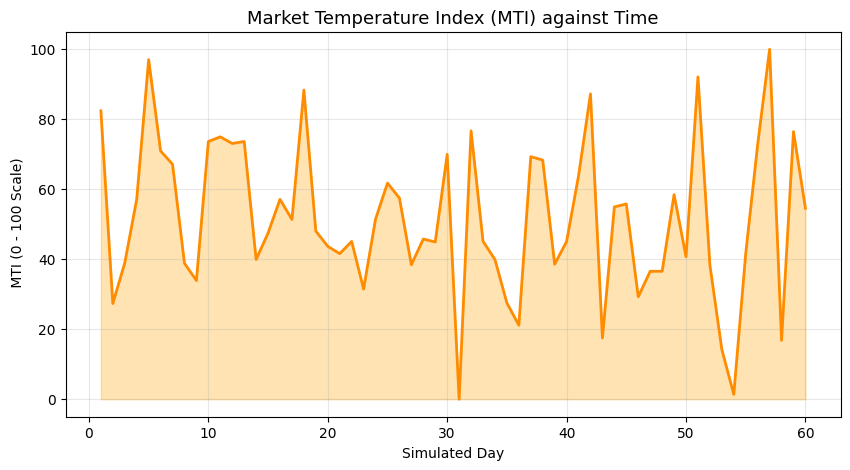

In [ ]:
# --- Constucting a Market Temperature Index (MTI) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp

# --- Simulate Intraday Market Data ---

np.random.seed(42)
n_simulations = 60 # trading days
n_steps = 390
T = 1 # represents one day
dt = T / n_steps

#  --- Price Process Parameters (placeholder inputs) ---

P0 = 1
mu = 0.5
sigma = 0.025

P = np.zeros((n_steps, n_simulations))
dW = np.random.standard_normal((n_steps, n_simulations))

for i in range(n_simulations):
    P[0, i] = P0
    for t in range(1, n_steps):
        P[t, i] = P[t - 1, i] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * dW[t, i])

# --- Volume Parameters (placeholder inputs) ---

alpha = 0.01
random_noise = dW
base = P
volatility = sigma
 
volume = base + random_noise + alpha * volatility

# --- Spread Parameters (placeholder inputs) ---

beta = 0.02

spread = base + beta * volatility

# --- Forming Data Frames ---
PX_columns = []

for i in range(1, n_simulations + 1, 1):
    PX_column_name = f'PX{i}'
    PX_columns.append(PX_column_name)

P_df = pd.DataFrame(P, columns = PX_columns)

volume_columns = []
for t in range(1, n_simulations + 1, 1):
    volume_column_name = f"volume{t}"
    volume_columns.append(volume_column_name)

volume_df = pd.DataFrame(volume, columns = volume_columns)

spread_columns = []
for t in range(1, n_simulations + 1, 1):
    spread_column_name = f"spread{t}"
    spread_columns.append(spread_column_name)

spread_df = pd.DataFrame(spread, columns = spread_columns)

# --- Realised Volatility Computation ---

dlnP_columns = []

for i in range(1, n_simulations+1, 1):
    dlnP_column_name = f'dlnP{i}'
    dlnP_columns.append(dlnP_column_name)

dlnP = np.log(P[1:] / P[:-1])
dlnP = pd.DataFrame(dlnP, columns = dlnP_columns)

dlnP_p2 = dlnP ** 2
dlnP_p2_df = pd.DataFrame(dlnP_p2)

RV_values = {}

for t in range(1, n_simulations + 1):
    
    source_column_name = f'dlnP{t}'
    destination_column_name = f'RV{t}'
    rv_value = dlnP_p2[source_column_name].sum()
    RV_values[destination_column_name] = np.sqrt(rv_value)

RV_series = pd.Series(RV_values)
print("Realised Volatility for each simulated trading day (RV1 to RV60):")
print(RV_series.head())

# --- Mean Bid-Ask Spread Computation ---

mean_bid_ask_spreads = {}

for t in range(1, n_simulations + 1):
    source_column_name = f'spread{t}'
    destination_column_name = f'L{t}'
    mean_bid_ask_spread = spread_df[source_column_name].mean()
    mean_bid_ask_spreads[destination_column_name] = mean_bid_ask_spread

L_series = pd.Series(mean_bid_ask_spreads)
print("\nMean bid-ask spread for each simulated trading day (L1 to L60):")
print(L_series.head())

# --- Turnover Intensity Calculation ---

turnover_intensities = {}

for t in range(1, n_simulations + 1):
    source_column_name = f'volume{t}'
    destination_column_name = f'T{t}'
    turnover_intensity = volume_df[source_column_name].sum()
    turnover_intensities[destination_column_name] = turnover_intensity

T_series = pd.Series(turnover_intensities)
print("\nTurnover intensity for each simulated trading day (T1 to T60):")
print(T_series.head())

# --- Market Temperature Index (MTI) Scalar Parameters (Placeholders) ---

w1 =  1 / 3
w2 =  1 / 3
w3 =  1 / 3

# --- Market Temperature Index (MTI) Calculation ---

raw_composite_values = {}

for t in range(1, n_simulations + 1):
    source_column_V = f'RV{t}'
    source_column_L = f'L{t}'
    source_column_T = f'T{t}'
    destination_column_name = f'X{t}'
    raw_composite_value = w1 * RV_series[source_column_V] + w2 * L_series[source_column_L] + w3 * T_series[source_column_T]
    raw_composite_values[destination_column_name] = raw_composite_value

X_series = pd.Series(raw_composite_values)
print("\nRaw composite value for each simulated trading day (X1 to X60):")
print(X_series.head())

market_temp_index = ((X_series - min(X_series)) / (max(X_series) - min(X_series)) * 100)

market_temp_index = pd.Series(market_temp_index)
print("\nMarket temperature index (MTI) for each simulated trading day (MTI1 to MTI60):")
print(market_temp_index.head())

# --- Data Visualisation ---

mti_series = pd.Series(market_temp_index)

# S_series = pd.Series(S, index=minutes_index, name='PX')
# S_df = pd.DataFrame({'Mid': S_series}, index=minutes_index)

x = range(1,n_simulations+1)

plt.figure(figsize = (10, 5));
plt.plot(x, mti_series, '-', color = 'darkorange', lw = 2);
plt.title('Market Temperature Index (MTI) against Time', fontsize = 13);
plt.fill_between(x, mti_series, color='orange', alpha=0.3)
plt.xlabel('Simulated Day')
plt.ylabel(' MTI (0 - 100 Scale)');
plt.grid(True, alpha=0.3);
plt.show();